In [1]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pow
%matplotlib inline
import json
import datetime


[WARNING] graphlab.product_key: Unable to write current GraphLab Create license to /Users/gabrielfior/.graphlab/config. Ensure that this user account                         has write permission to /Users/gabrielfior/.graphlab/config to save the license for offline use.


This non-commercial license of GraphLab Create for academic use is assigned to ga46mal@mytum.de and will expire on July 08, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1485769679.log
[WARNING] graphlab.deploy._session: Unable to create session in specified location: '/Users/gabrielfior/.graphlab/artifacts'. Using: '/var/tmp/graphlab-gabrielfior/2214/tmp_session_1b2c6940-6e99-40a1-b389-49b61bf778fa'
/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
loading=True #Set True to load full csv file
ev = '990'
full_csv_path = '/Volumes/UNTITLED/Geant4_data/B4_nt_'+(ev)+'ev_1um_processed.csv'
name_export = 'electrons_rangecut_'+ev+'ev.json'
columns = ['step_number','energy_deposit','r','perp','particleName','trackId','parentId',
          'kinecticEnergyDiff','stepLength','posX','posY','posZ','volumeName','processName',
          'preKinecticEnergy','postKineticEnergy','endstep','count_particle']



In [3]:
#read json
name_export = ['electrons_rangecut_1ev.json','electrons_rangecut_10ev.json',
              'electrons_rangecut_100ev.json','electrons_rangecut_500ev.json',
              'electrons_rangecut_990ev.json']
name_export_protons = ['protons_rangecut_1ev.json','protons_rangecut_10ev.json',
              'protons_rangecut_100ev.json','protons_rangecut_500ev.json',
              'protons_rangecut_990ev.json']
name_export = ['electrons_rangecut_1ev.json']
#name_export_protons = ['protons_rangecut_1ev.json']
data=[]
for i in name_export:
    file_dir_el = '/Volumes/UNTITLED/Geant4_data/electron_files/'
    file_dir_el = '/Users/gabrielfior/OneDrive/Master Thesis/Share_Ubuntu/'        
    with open(file_dir_el+i) as data_file:    
        data.append(json.load(data_file))

data_proton=[]
for i in name_export_protons:
    file_dir_prot = '/Users/gabrielfior/OneDrive/Master Thesis/Share_Ubuntu/'        
    with open(file_dir_prot+i) as data_file:    
        data_proton.append(json.load(data_file))
        
#Read origin file
with open(file_dir_prot+'protons_rangecut_1ev_origin.json') as data_file:    
    data_origin = (json.load(data_file))


In [4]:
print len(data), len(data_proton)

1 5


In [9]:
a1 = pd.DataFrame(data[0])
#a10 = pd.DataFrame(data[1])
#a100 = pd.DataFrame(data[2])
#a500 = pd.DataFrame(data[3])
#a990 = pd.DataFrame(data[4])

pa1 = pd.DataFrame(data_proton[0])
pa10 = pd.DataFrame(data_proton[1])
pa100 = pd.DataFrame(data_proton[2])
pa500 = pd.DataFrame(data_proton[3])
pa990 = pd.DataFrame(data_proton[4])


In [6]:
pa1.energy_deposit.mean()

1.2584699999841376

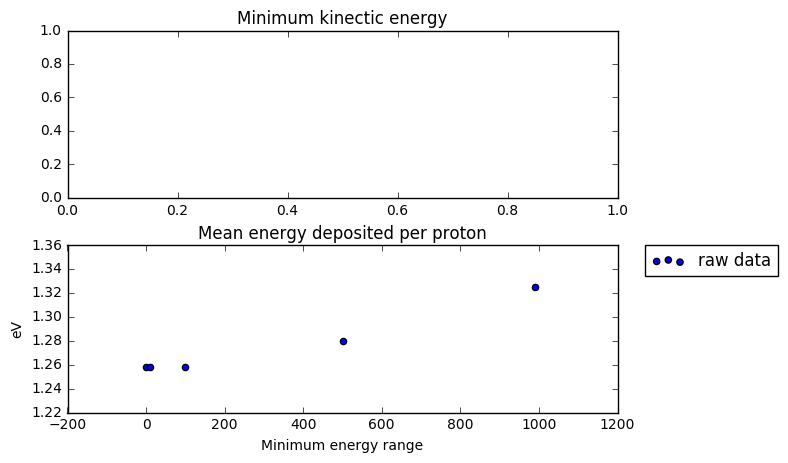

In [10]:
plt.subplot(211)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.title('Minimum kinectic energy')

#plt.scatter([1,10,100,500,990],[a1.preKinecticEnergy.min(),a10.preKinecticEnergy.min(),
#                             a100.preKinecticEnergy.min(),a500.preKinecticEnergy.min(),
#                             a990.preKinecticEnergy.min()],label='raw data')
#plt.plot([1,10,100,500,990],[a1.preKinecticEnergy.min(),a10.preKinecticEnergy.min(),
#                             a100.preKinecticEnergy.min(),a500.preKinecticEnergy.min(),
#                             a990.preKinecticEnergy.min()])
#plt.plot([1,10,100,500,990],[1,10,100,500,990],'r',label='x+y=0')

plt.subplot(212)
plt.scatter([1,10,100,500,990],[pa1.energy_deposit.mean(),pa10.energy_deposit.mean(),
                             pa100.energy_deposit.mean(),pa500.energy_deposit.mean(),
                             pa990.energy_deposit.mean()],label='raw data')
plt.xlabel('Minimum energy range')
plt.title('Mean energy deposited per proton')
plt.ylabel('eV')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
print 'Minimum kinectic energy'

print a1.preKinecticEnergy.min()

print 'Mean energy deposited per proton'
print pa1.energy_deposit.mean()

Minimum kinectic energy
994.633
Mean energy deposited per proton
1.25846999998


In [12]:
#Sum energy deposited for all cases (protons+electrons)
#el_energy = [a1,a10,a100,a500,a990]
el_energy = [a1]
#p_energy = [pa1,pa10,pa100,pa500,pa990]
p_energy = [pa1]
list_scaping_el=[]
list_scaping_p=[]
list_kinectic_ediff=[]
endep=[]
for i in range(len(el_energy)):
    endep.append([el_energy[i].energy_deposit.sum(),p_energy[i].energy_deposit.sum(),
                 el_energy[i].energy_deposit.sum() + p_energy[i].energy_deposit.sum()])
    idx_el = el_energy[i].groupby(['count_particle'])['step_number'].transform(max)==el_energy[i]['step_number']


    list_scaping_el.append(el_energy[i][idx_el].postKineticEnergy.sum())
    list_kinectic_ediff.append(p_energy[i].kinecticEnergyDiff.sum())

ValueError: x and y must be the same size

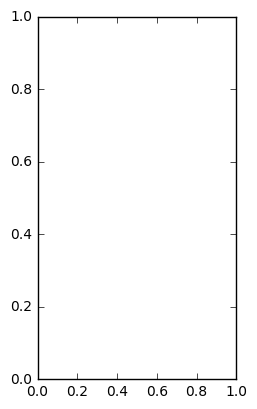

In [13]:
plt.subplot(121)
plt.tight_layout(pad=0.4, w_pad=11.0, h_pad=1.0)
plt.scatter([1,10,100,500,990],np.array(endep)[:,0],label='e',c='r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1100])
plt.title('energy deposited e-')
plt.ylabel('eV')
plt.xlabel('Minimum energy range')
plt.subplot(122)
plt.scatter([1,10,100,500,990],np.array(endep)[:,1],label='p+',c='b')
plt.scatter([1,10,100,500,990],np.array(endep)[:,2],label='e- + p+',c='g')
plt.title('Total energy deposited')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('eV')
plt.xlabel('Minimum energy range')
plt.xlim([-0.1,1100])
plt.show()


In [ ]:

plt.subplot(121)
plt.tight_layout(pad=0.4, w_pad=11.0, h_pad=1.0)
plt.scatter([990],np.array(endep)[:,0],label='e',c='r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1100])
plt.title('energy deposited e-')
plt.ylabel('eV')
plt.xlabel('Minimum energy range')
plt.subplot(122)
plt.scatter([990],np.array(endep)[:,1],label='p+',c='b')
plt.scatter([990],np.array(endep)[:,2],label='e- + p+',c='g')
plt.title('Total energy deposited')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('eV')
plt.xlabel('Minimum energy range')
plt.xlim([-0.1,1100])
plt.show()




In [ ]:
#diff between 990 and 1
np.array(endep)[0,:]

In [ ]:
idx = a1.groupby(['count_particle'])['step_number'].transform(max)==a1['step_number']
a1[idx].postKineticEnergy.sum()

#.agg({'energy_deposit':sum,
#                                                                'step_number':max,
#                                                                'kinecticEnergyDiff':sum     
#      In [3]: idx = df.groupby(['Mt'])['count'].transform(max) == df['count']
#In [4]: df[idx]

In [ ]:
#plt.scatter([1,10,100,500,990],-1/1.e6*np.array(list_kinectic_ediff),c='r',label='kinectic energy diff from p+')
#plt.scatter([1,10,100,500,990],np.array(endep)[:,2]/1.e6,c='b',label='total energy deposited+escaping e-')

plt.scatter([0],-1/1.e6*np.array(list_kinectic_ediff),c='r',label='kinectic energy diff from p+')
plt.scatter([0],np.array(endep)[:,2]/1.e6,c='b',label='total energy deposited+escaping e-')

plt.ylabel('MeV')
plt.title('Energy overview')
plt.xlabel('Energy range cut (eV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
#Energy lost by proton
pa1.kinecticEnergyDiff.mean()
#pa1.energy_deposit.sum()

In [ ]:
#Plot energy lost for different energy cuts
p_energy = [pa1,pa10,pa100,pa500,pa990]
mydiff = []
for i in p_energy:
    mydiff.append( i.kinecticEnergyDiff.mean())
    
#mydiff.append(p_origin.kinecticEnergyDiff.mean())
plt.scatter([1,10,100,500,990],mydiff,c='r',label='Penelope')
plt.scatter([990],p_origin.kinecticEnergyDiff.mean(),c='b',label='Normal EM Physics')
plt.title('Mean energy lost by proton')
plt.xlabel('Energy cut (eV)')
plt.ylabel('eV')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
p_origin = pd.DataFrame(data_origin)

In [ ]:
p_origin.head(10)